<a href="https://colab.research.google.com/github/abyanjan/Pytorch-Deep-Learning/blob/master/Logistic_regression_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression with Pytorch

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data

In [ ]:
# load breast cancer data
data = datasets.load_breast_cancer()

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# extracting features and target
X, y = data.data, data.target
features = data.feature_names

In [ ]:
# display the data with input features
pd.DataFrame(X, columns=features).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# number of samples and features
print(f'Number of Samples: {X.shape[0]}')
print(f'Number of Features: {X.shape[1]}')

Number of Samples: 569
Number of Features: 30


In [ ]:
# target
data.target_names

array(['malignant', 'benign'], dtype='<U9')

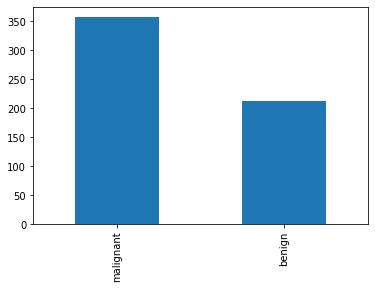

In [ ]:
# target distribution
target = pd.Series(y).map({1:'malignant',0:'benign'})
target.value_counts().plot(kind='bar')

**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


**Scaling the features**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Convert to pytorch tensor**

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test= torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
# reshaping the target
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

### Logistic Regression Model

In [ ]:
# define the model
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [ ]:
# create model
n_features = len(features)
model = LogisticRegression(n_input_features=n_features)

In [ ]:
# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.05)

In [ ]:
# training loop
epochs = 300

for epoch in range(epochs):
  # forward pass and loss
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  # backward pass
  loss.backward()

  # updates
  optimizer.step()

  # zero gradient
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch:{epoch+1}, loss: {loss.item():.4f}')

epoch:10, loss: 0.3239
epoch:20, loss: 0.2364
epoch:30, loss: 0.1971
epoch:40, loss: 0.1734
epoch:50, loss: 0.1571
epoch:60, loss: 0.1450
epoch:70, loss: 0.1355
epoch:80, loss: 0.1279
epoch:90, loss: 0.1217
epoch:100, loss: 0.1164
epoch:110, loss: 0.1119
epoch:120, loss: 0.1080
epoch:130, loss: 0.1045
epoch:140, loss: 0.1014
epoch:150, loss: 0.0987
epoch:160, loss: 0.0962
epoch:170, loss: 0.0940
epoch:180, loss: 0.0919
epoch:190, loss: 0.0900
epoch:200, loss: 0.0883
epoch:210, loss: 0.0867
epoch:220, loss: 0.0852
epoch:230, loss: 0.0838
epoch:240, loss: 0.0824
epoch:250, loss: 0.0812
epoch:260, loss: 0.0800
epoch:270, loss: 0.0789
epoch:280, loss: 0.0779
epoch:290, loss: 0.0769
epoch:300, loss: 0.0760


In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
with torch.no_grad():
  y_test_pred = model(X_test)
  y_test_pred_class = y_test_pred.round()
  acc = (y_test_pred_class == y_test).sum()/float(y_test.shape[0])
  auc = roc_auc_score(y_test.numpy(),y_test_pred.numpy())

  print(f'Accuracy:{acc:.4f}')
  print(f'AUC: {auc:.4f}')

Accuracy:0.9474
AUC: 0.9865
